import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns
%matplotlib inline



### Load Data

In [96]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [97]:
df = pd.read_csv('cars-dataset.csv')
df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


Check dataset details

In [98]:
df.shape

(398, 8)

In [99]:
df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

Remove missing values from the dataset

In [100]:
df.dropna(inplace=True)

In [101]:
df.shape

(398, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a224a4390>,
      dtype=object)

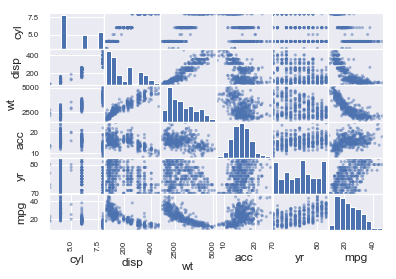

In [102]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05)

### Explore & Visualize Dataset

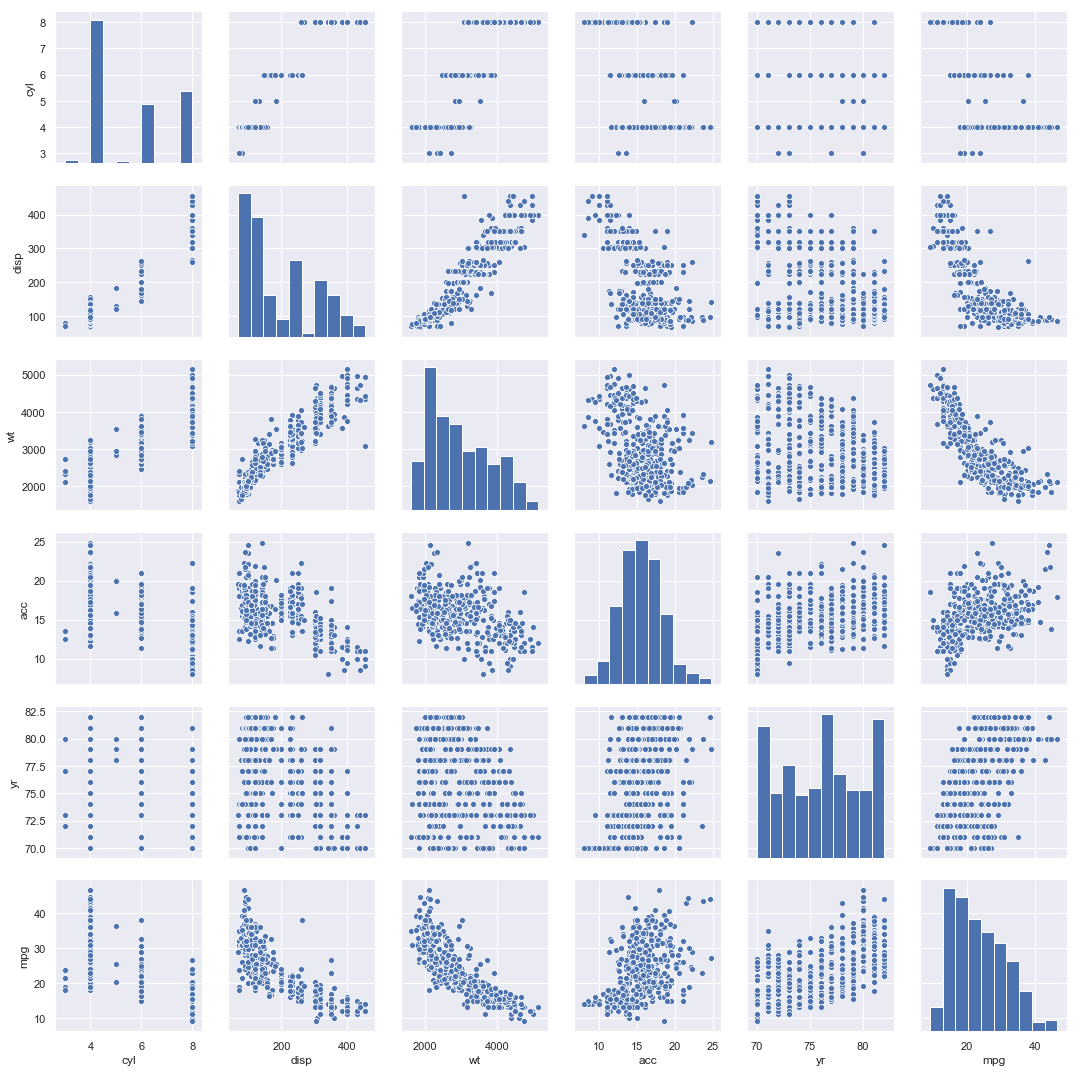

In [103]:
sns.pairplot(df, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

Geograhic information

In [104]:
# from the above pairplot & scatter plots - cluster count seems to be 3 or 4

In [105]:
# Above Elbow Plot shows 3 to be the ideal cluster count

### How many Clusters to use?

In [107]:
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 3)
  clusters.fit(df[['cyl', 'disp', 'wt', 'acc', 'yr']])
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia 


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]



,num_clusters,cluster_errors
0,1,2.890308e+08
1,2,7.398176e+07
2,3,3.401787e+07
3,4,1.888045e+07
4,5,1.362999e+07
5,6,1.013764e+07
6,7,7.507144e+06
7,8,5.513174e+06
8,9,4.747248e+06


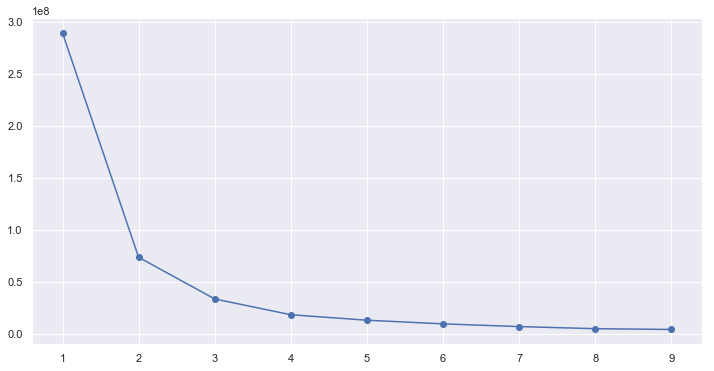

In [108]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [78]:
# Above Elbow Curve shows 3 will be the ideal cluster count

Visualize clusters with K=3

wt     2803.5
acc      15.5
dtype: float64


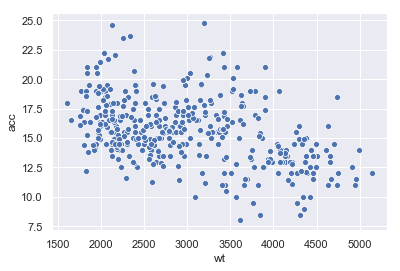

In [79]:
sns.scatterplot(x='wt', y='acc', data=df, palette='spring')
print(df.agg({'wt':'median', 'acc':'median'}))



In [112]:
kmeans = KMeans(3, n_init = 3)
# predictions = clusters.predict(df[['cyl', 'disp', 'wt', 'acc', 'yr']])

colnames = ['cyl', 'disp', 'wt', 'acc', 'yr']
kmeans.fit(df[['cyl', 'disp', 'wt', 'acc', 'yr']])
prediction= kmeans.predict(df)
#X["clusters"] = prediction
pred_df = pd.DataFrame(df, columns= colnames)
pred_df["group"] = prediction


colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(pred_df.loc[pred_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])


ValueError: could not convert string to float: 'chevrolet chevelle malibu'